# **COMP9727 Recommender Systems**
## Tutorial Week 4: Association Rule Mining

@Author: **Mingqin Yu**

@Reviewer: **Wayne Wobcke**

### Objective

The aim of the tutorial is to become more familiar with association rule mining and the Apriori algorithm through a simple example. This approach may be useful for session-based web page recommendation or generating critiques for knowledge-based recommender systems.

### Before the tutorial

1. Review the lecture material on association rule mining and the Apriori algorithm.

2. Read, understand and run all the code in the Data Mining pipeline below, and come prepared to discuss the answers to some of the questions.

## Data Mining Pipeline

1. **Environment Setup**
   - Install libraries and tools
   - Load data
2. **Apriori Algorithm Implementation**
   - Transform transaction data into a binary matrix representation
   - Apriori algorithm
   - Generate frequent itemsets using a support threshold
   - Generate association rules based on a confidence threshold
3. **User Profile-Based Recommendations**
   - Merge traditional association rule recommendations with user profile data
   - Demonstrate how user profiles can further refine recommendations

**Specific Learning Objectives**

1. **Understand**
   - The significance and application of association rule mining in the context of recommender systems
   - The use of metrics such as support and confidence
2. **Apply**
   - Set up a Python environment for implementing association rule mining
   - Transform transactional data into a suitable format for rule mining
   - Run the Apriori algorithm to extract frequent itemsets from transaction data
3. **Analyse**
   - User profile data to enhance the quality of recommendations
4. **Evaluate**
   - The effectiveness of the recommender system on sample data
   - The balance between user-specific recommendations and item-based recommendations
   - Visualize and interpret the results at each stage of the tutorial for deeper comprehension

## Data Mining Pipeline

### 1. Environment Setup

__Step 1. Install libraries and packages__

The "pandas" library provides powerful and easy-to-use data structures and data analysis tools
- **Common Methods**
    - `pd.DataFrame()`: Creates a new dataframe
    - `pd.read_csv()`: Reads data from a csv file into a dataframe

The `combinations` function from the "itertools" module is used to generate all possible combinations of a given iterable (like a list or set) of a specified length
- **Parameter Settings**
    - `iterable`: The iterable (like a list or set) from which combinations are generated
    - `r`: The length of each combination. If not specified, it generates combinations of all possible lengths
- **Usage Example**
    - `combinations([1, 2, 3], 2)` would generate combinations of length 2 from the list `[1, 2, 3]`, resulting in `[(1, 2), (1, 3), (2, 3)]`

In [ ]:
# Import necessary libraries: pandas for data manipulation and combinations for creating combinations
import pandas as pd
from itertools import combinations

__Step 2. Load Data__

Store the mock data that simulates transactions and user profiles

`transactions`
- **Purpose**: Represents a list of transactions where each transaction is a list of products bought in that particular transaction
- **Type**: List of lists
- **Usage**: This data structure will help simulate a basic transaction dataset: e`ach inner list is a representation of a single transaction and the products involved

`users`
- **Purpose**: Represents a dictionary of user profiles
- **Type**: Dictionary
    - **Keys**
        - **`UserID`**: Unique identifier for each user
        - **`Age`**: Age of the user
        - **`Gender`**: Gender of the user
        - **`Occupation`**: Occupation of the user
- **Usage**: This dictionary simulates user profiles with attributes like age, gender, and occupation and can be converted into a DataFrame using `pandas` for further analysis and manipulation

In [2]:
# Simulated transactions and user profiles for demonstration
transactions = [
    ['Milk', 'Bread', 'Eggs'],
    ['Milk', 'Bread'],
    ['Bread', 'Eggs', 'Juice'],
    ['Milk', 'Juice', 'Cereal'],
    ['Milk', 'Bread', 'Eggs', 'Cereal'],
]

Milk      4
Bread     4
Eggs      3
Juice     2
Cereal    2
dtype: int64


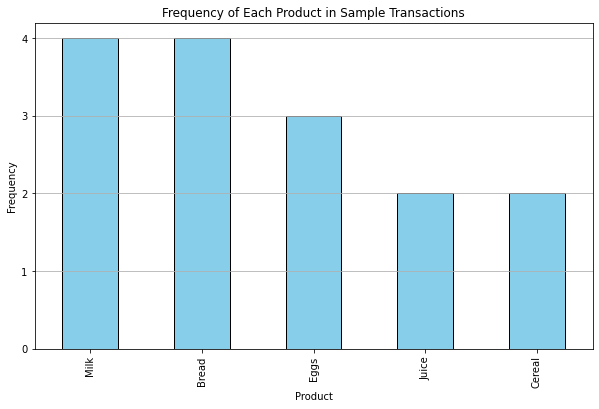

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Generate the product_counts series
product_counts = pd.Series([item for sublist in transactions for item in sublist]).value_counts()
print(product_counts)

# Plot the product frequencies
product_counts.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title('Frequency of Each Product in Sample Transactions')
plt.ylabel('Frequency')
plt.xlabel('Product')
plt.yticks(np.arange(0, product_counts.max()+ 1, 1))
plt.grid(axis='y')
plt.show()

In [4]:
# Simulated user profiles
users = {
    'UserID': [1, 2, 3, 4, 5],
    'Age': [25, 32, 45, 28, 39],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Occupation': ['Engineer', 'Doctor', 'Teacher', 'Lawyer', 'Engineer']
}

User Profiles:
   UserID  Age  Gender Occupation
0       1   25    Male   Engineer
1       2   32  Female     Doctor
2       3   45    Male    Teacher
3       4   28  Female     Lawyer
4       5   39    Male   Engineer



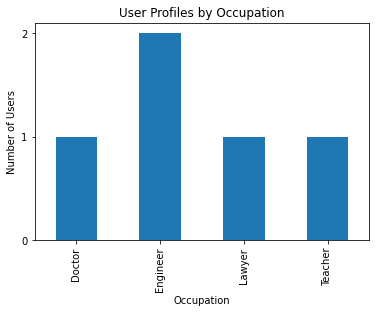

In [5]:
# Convert user profiles to a DataFrame
user_df = pd.DataFrame(users)
print(f"User Profiles:\n{user_df}\n")

# Visualize user profiles by occupation
user_df.groupby('Occupation').size().plot(kind='bar', figsize=(6, 4))
plt.title('User Profiles by Occupation')
plt.ylabel('Number of Users')
plt.xlabel('Occupation')
plt.yticks(np.arange(0, user_df.groupby('Occupation').size().max() + 1, 1))
plt.show()

### 2. Apriori Algorithm Implementation

__Step 1. Data Preparation__

Transform the transactional data into a binary matrix representation that will be more suitable for the Apriori algorithm

**`unique_products`**
- **Purpose**: Generate a list of unique products across all transactions
- **Function**: The inner list comprehension (`item for sublist in transactions for item in sublist`) flattens the transaction list. The outer `set` ensures that we only keep unique products. Finally, `sorted` arranges them in alphabetical order.
 - **Type**: List.
- **Usage**: This list will serve as the columns for the binary matrix representation of transactions.

**`pd.DataFrame()`**
- **Purpose**: Convert data into a structured table (dataframe) for easier manipulation
- **Function**: Creates a dataframe from provided data
- **Parameters**
    - **data**: Input data to be converted into a dataframe. Here, we use a list comprehension to generate the binary representation
    - **columns**: Names of columns for the dataframe. Here, we use the `unique_products` list
- **Usage**: The resulting `binary_df` dataframe will have a binary representation where rows correspond to transactions and columns to products. A "1" indicates the product was in the transaction, and "0" means it wasn't.


Binary Matrix Representation:
   Bread  Cereal  Eggs  Juice  Milk
0      1       0     1      0     1
1      1       0     0      0     1
2      1       0     1      1     0
3      0       1     0      1     1
4      1       1     1      0     1


Bread     4
Cereal    2
Eggs      3
Juice     2
Milk      4
dtype: int64


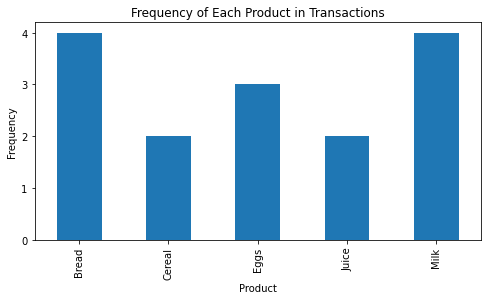

In [6]:
# Get a list of all unique products across transactions
unique_products = sorted(list(set(item for sublist in transactions for item in sublist)))

# Create a binary matrix representation of transactions
binary_df = pd.DataFrame([[1 if product in transaction else 0 for product in unique_products] for transaction in transactions], columns=unique_products)

# Print the binary matrix representation
print("Binary Matrix Representation:")
print(binary_df)
print("\n")

# Plot the frequency of each product in the binary matrix representation
print(binary_df.sum())
binary_df.sum().plot(kind='bar', figsize=(8, 4))
plt.title('Frequency of Each Product in Transactions')
plt.ylabel('Frequency')
plt.xlabel('Product')
plt.yticks(np.arange(0, binary_df.sum().max() + 1, 1))
plt.show()

__Step 2. Apriori Algorithm__

The Apriori algorithm identifies frequent itemsets from a transaction database. A frequent itemset is a set of one or more items that appear together in a significant number of transactions.

`apriori_frequent_itemsets`
- **Purpose**: Identifies the frequent itemsets in the transaction data
- **Parameters**:
    - **`data`**: The binary matrix representation of transactions
    - **`min_support`** (default = 0.3): The minimum proportion of transactions in which an itemset needs to appear to be considered frequent
- **Returns**: A list of frequent itemsets

`combinations`
- **Library**: `itertools`
- **Purpose**: Generates all possible combinations of a given length from a list
- **Usage**: Used to generate candidate itemsets of size `k` from the previously found frequent itemsets

`num_transactions`
- **Purpose**: Stores the total number of transactions
- **Usage**: Used to calculate the support of itemsets

`freq_1_itemsets`
- **Purpose**: Stores the frequent 1-itemsets
- **Usage**: This is the starting point. From here, the algorithm will look for larger itemsets.

`candidates`
- **Purpose**: A list of candidate itemsets generated from the frequent itemsets of the previous iteration
- **Usage**: From these candidates, the algorithm will determine which ones are frequent in the current iteration

In [7]:
# Implement the Apriori algorithm to find frequent itemsets
def apriori_frequent_itemsets(data, min_support=0.3):
    num_transactions = len(data)
    num_items = len(data.columns)
    frequent_itemsets = []

    # 1-itemsets
    freq_1_itemsets = data.loc[:, (data.sum(axis=0)/num_transactions) >= min_support].columns.tolist()
    frequent_itemsets = [[item] for item in freq_1_itemsets]

    k = 2
    found_new_itemset = True
    while found_new_itemset and k < num_items:
        found_new_itemset = False
        candidates = list(combinations(freq_1_itemsets, k))     # simplification: generates all combinations of size k
        for candidate in candidates:
            candidate_df = data[list(candidate)]
            support = (candidate_df.sum(axis=1) == k).mean()    # sum of row values: 1 if transaction contains item, 0 otherwise
            if support >= min_support:
                print('Itemset', list(candidate), 'Support =', support)
                frequent_itemsets.append(list(candidate))
                found_new_itemset = True
        k += 1

    return frequent_itemsets

frequent_sets = apriori_frequent_itemsets(binary_df)
print(f"Frequent Itemsets:\n{frequent_sets}")

Itemset ['Bread', 'Eggs'] Support = 0.6
Itemset ['Bread', 'Milk'] Support = 0.6
Itemset ['Cereal', 'Milk'] Support = 0.4
Itemset ['Eggs', 'Milk'] Support = 0.4
Itemset ['Bread', 'Eggs', 'Milk'] Support = 0.4
Frequent Itemsets:
[['Bread'], ['Cereal'], ['Eggs'], ['Juice'], ['Milk'], ['Bread', 'Eggs'], ['Bread', 'Milk'], ['Cereal', 'Milk'], ['Eggs', 'Milk'], ['Bread', 'Eggs', 'Milk']]


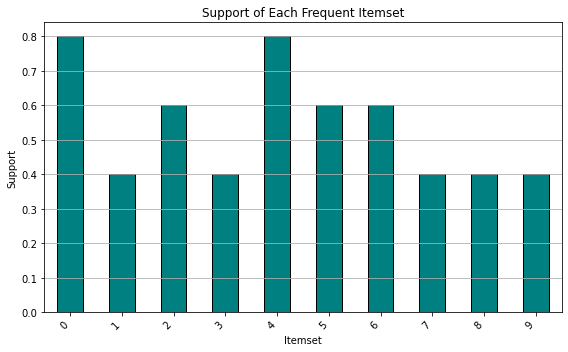

In [8]:
# Count the frequency of each frequent itemset
frequent_itemset_counts = pd.Series([(binary_df[itemset].sum(axis=1) == len(itemset)).sum()/len(transactions) for itemset in frequent_sets])

# Plot the frequencies of frequent itemsets
frequent_itemset_counts.plot(kind='bar', figsize=(8, 5), color='teal', edgecolor='black')
plt.title('Support of Each Frequent Itemset')
plt.ylabel('Support')
plt.xlabel('Itemset')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

__Step 3. Association Rule Generation__

The next step is to generate association rules. These rules suggest that if certain items are bought (antecedents), other items (consequents) are likely to be bought as well. The confidence of an association rule A $\rightarrow$ B is Support(A $\cup$ B)/Support(A).

`generate_rules`
- **Purpose**: To generate association rules from the frequent itemsets
- **Parameters**
    - **`data`**: The binary matrix representation of transactions
    - **`frequent_itemsets`**: The frequent itemsets identified using the Apriori algorithm
    - **`min_confidence`** (default = 0.5): The minimum confidence threshold for a rule to be considered valid
- **Returns**: A list of rules. Each rule is represented as a tuple with antecedent, consequent, and confidence

`combinations`
- **Purpose**: Used here to generate all possible antecedents for a given frequent itemset

`antecedent_support` and `both_support`
- **Purpose**: Calculate the support of the antecedent and the combined support of antecedent and consequent, respectively
- **Usage**: These support values are required to compute the confidence of a rule





In [9]:
# Function to generate association rules from frequent itemsets
def generate_rules(data, frequent_itemsets, min_confidence=0.5):
    rules = []
    for itemset in frequent_itemsets:
        for i in range(1, len(itemset)):
            antecedents = list(combinations(itemset, i))
            consequents = [tuple(set(itemset) - set(a)) for a in antecedents]
            for antecedent, consequent in zip(antecedents, consequents):
                antecedent_support = (data[list(antecedent)].sum(axis=1) == len(antecedent)).mean()
                both_support = (data[list(itemset)].sum(axis=1) == len(itemset)).mean()
                confidence = both_support / antecedent_support
                if confidence >= min_confidence:
                    rules.append((antecedent, consequent, confidence))
    return rules

rules = generate_rules(binary_df, frequent_sets)

Association Rules (antecedent -> consequent with confidence):

('Bread',) -> ('Eggs',) with confidence 0.75
('Eggs',) -> ('Bread',) with confidence 1.00
('Bread',) -> ('Milk',) with confidence 0.75
('Milk',) -> ('Bread',) with confidence 0.75
('Cereal',) -> ('Milk',) with confidence 1.00
('Milk',) -> ('Cereal',) with confidence 0.50
('Eggs',) -> ('Milk',) with confidence 0.67
('Milk',) -> ('Eggs',) with confidence 0.50
('Bread',) -> ('Eggs', 'Milk') with confidence 0.50
('Eggs',) -> ('Bread', 'Milk') with confidence 0.67
('Milk',) -> ('Bread', 'Eggs') with confidence 0.50
('Bread', 'Eggs') -> ('Milk',) with confidence 0.67
('Bread', 'Milk') -> ('Eggs',) with confidence 0.67
('Eggs', 'Milk') -> ('Bread',) with confidence 1.00




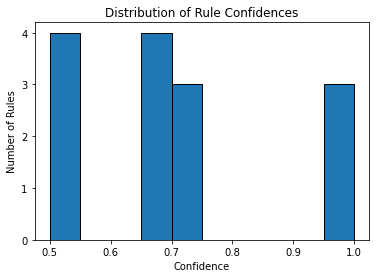

In [10]:
# Print the association rules
print("Association Rules (antecedent -> consequent with confidence):\n")
for antecedent, consequent, confidence in rules:
    print(f"{antecedent} -> {consequent} with confidence {confidence:.2f}")
print("\n")

# Visualize the distribution of rule confidences
confidences = [rule[2] for rule in rules]
(n, bins, patches) = plt.hist(confidences, bins=10, edgecolor='black')
plt.xlabel('Confidence')
plt.ylabel('Number of Rules')
plt.yticks(np.arange(0, n.max() + 1, 1))
plt.title('Distribution of Rule Confidences')
plt.show()

### 3. User Profile-Based Recommendations

__Step 1. Recommendations__

We enhance our recommendations by considering user profiles. Personalizing recommendations based on user attributes (like age, gender, occupation) can improve recommendation relevance. For each rule, if the antecedent is a subset of `cart_items`, we add the consequent to the recommendations. This means that if a user has items in their cart that match the antecedent of a rule, we recommend the consequent items. Depending on the user's occupation and age, we might add specific items to the recommendations. For example, if the user is an engineer, we might recommend "Technical Books".

`user_based_recommendations`
- **Purpose**: To generate personalized product recommendations based on the user's profile and the items in their cart
- **Parameters**:
    - **`user_profile`**: A dictionary containing user attributes
    - **`cart_items`**: List of items currently in the user's cart
    - **`rules`**: Association rules generated earlier
- **Returns**: A list of recommended items.

`recommendations.difference`
- This ensures that we don't recommend items that are already in the user's cart

In [11]:
# Function to provide user-based recommendations considering:
# 1. Association rules based on products in the user's cart,
# 2. Specific recommendations based on user's profile.
def user_based_recommendations(user_profile, cart_items, rules):
    recommendations = set()

    # Association rules
    for antecedent, consequent, _ in rules:
        if set(antecedent).issubset(set(cart_items)):
            recommendations.update(consequent)

    # User profile example
    if user_profile['Occupation'] == 'Engineer':
        recommendations.add('Technical Books')
    elif user_profile['Occupation'] == 'Doctor':
        recommendations.add('Medical Supplies')
    elif 20 <= user_profile['Age'] <= 30:
        recommendations.add('Energy Drink')

    recommendations = recommendations.difference(set(cart_items))
    return list(recommendations)

for antecedent, consequent, confidence in rules:
    print(f"{antecedent} -> {consequent} with confidence {confidence:.2f}")
print("\n")

('Bread',) -> ('Eggs',) with confidence 0.75
('Eggs',) -> ('Bread',) with confidence 1.00
('Bread',) -> ('Milk',) with confidence 0.75
('Milk',) -> ('Bread',) with confidence 0.75
('Cereal',) -> ('Milk',) with confidence 1.00
('Milk',) -> ('Cereal',) with confidence 0.50
('Eggs',) -> ('Milk',) with confidence 0.67
('Milk',) -> ('Eggs',) with confidence 0.50
('Bread',) -> ('Eggs', 'Milk') with confidence 0.50
('Eggs',) -> ('Bread', 'Milk') with confidence 0.67
('Milk',) -> ('Bread', 'Eggs') with confidence 0.50
('Bread', 'Eggs') -> ('Milk',) with confidence 0.67
('Bread', 'Milk') -> ('Eggs',) with confidence 0.67
('Eggs', 'Milk') -> ('Bread',) with confidence 1.00




__Step 2. Recommendations with User Profiles__

We test our user profile-based recommendation system with a sample user profile and list of items in their cart to see what the system suggests for them.

**Sample User Profile and Cart**
- **`user_profile_sample`**: A dictionary containing the profile of a sample user. The user is a 25-year-old male engineer.
- **`cart_sample`**: A list representing the items currently in the sample user's cart. This user has "Milk" and "Bread" in their cart.

`user_based_recommendations`
- The function `user_based_recommendations` is called with the sample user profile, cart items and previously generated rules
- The function will then provide product recommendations based on association rules and the user's profile

In [12]:
# Sample user profile and cart for demonstration
user_profile_sample = {'UserID': 1, 'Age': 25, 'Gender': 'Male', 'Occupation': 'Engineer'}
cart_sample = ['Milk', 'Bread']

# Get personalized recommendations for the sample user
personal_recommendations = user_based_recommendations(user_profile_sample, cart_sample, rules)
print(f"For a user with profile:\n{user_profile_sample}\n")
print(f"Having items {cart_sample} in their cart, the system recommends:\n{personal_recommendations}")

For a user with profile:
{'UserID': 1, 'Age': 25, 'Gender': 'Male', 'Occupation': 'Engineer'}

Having items ['Milk', 'Bread'] in their cart, the system recommends:
['Cereal', 'Technical Books', 'Eggs']


## Discussion Questions

1. **Parameter Tuning**
    - Try adjusting the `min_support` and `min_confidence` parameters in the Apriori algorithm.
    - What differences do you observe with a higher/lower `min_support`?
    - How does changing the `min_confidence` to 0.2 compare to 0.8 affect the association rules generated?
    - Draw an analogy to precision and recall to explain the differences.
2. **Profile-Based Recommendations**
    - Assume we could generate such association rules from transactions data.
    - Would association rules of this nature produce "better" recommendations for all users?
    - Would such association rules help address cold start problem for users?
    - Again consider the precision/recall trade-off?
3. **New Metrics**
    - Add a "lift" metric to evaluate the association rules (Google it!).
    - How does "lift" compare to "confidence" in gauging the quality of a rule?
    - Try filtering rules based on a minimum "lift" value.
    - How does this filter compare to using confidence?
    - What difference would this make to the recommendations?
4. **Alternative Applications**
    - Consider extending `user_based_recommendations` to use additional user attributes?
    - Think about including browsing history or past product ratings.
    - How might you generate recommendations based on a user's past browsing?
    - Can you design a method to prioritize recommendations using both association rules and a user's product ratings?
5. **Visual Insight into Rules**
    - Design a function that can visually display the association rules.
    - This might be a graph, heatmap or any other visualization.
    - Which visualization would help you understand product relationships best?
    - Can you design a visualization that shows only the top 10 rules with the highest confidence?
6. **Learning from User Feedback**
    - Imagine users can give feedback on your recommendations. How would you incorporate this feedback to improve future suggestions?
    - If a user regularly dismisses a recommendation, how should the system respond?
    - Think about how you might prioritize products that consistently receive positive feedback.

## Advanced

1. Think about the analogy between association rule mining and item-based collaborative filtering. How do these methods differ and what are their respective strengths and weaknesses?